In [19]:

import numpy as np
import copy

import scipy as scipy
from scipy import interpolate
from scipy.fft import fft, ifft

import matplotlib.pyplot as plt
import math

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

import polarTransform

from marvin.tools import Maps

from tqdm import tqdm

import Bicone_Classifier


# Deploy the pipeline and test

### Plot the curve

This gives how obvious the frequency of 4 appears. 

min = 222

The old method was inherited from the polar coordinates. We built a new elliptic coordinate and deployed. 

Later the pipeline was used for testing the half-normalization selction. 

as the pipeline below: 

In [30]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_training_set.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

training = []
for i in plateifu:
    if len(i) >= 2:
        training.append(i)
len(training)

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_training_set.fits' mode='rb' closefd=True> (ResourceWarning)


171

In [34]:

loss_summary = []

for data in tqdm(training):
    print(data)
    ellip = Bicone_Classifier.ellip_gen(data)
    peak_loss = []
    four_summary = []
    ten_summary = []
    for i in np.linspace(0.4, 4.0, 19):
        start, end = round(i,1), round(i,1)+0.3
        try:
            curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 2, smooth = 2)
            #plt.plot(curve)
            result = Bicone_Classifier.fourier_classifier(curve)

            four_summary.append(result[3][0])
            ten_summary.append(result[3][1])

            #plt.plot(result[0])
            #print(result[1][1])

            if result[1][1] == 3:
                peak_loss.append(result[3][1])
            else:
                pass
        except:
            pass
    
    loss_summary.append(sum(peak_loss))
    #print(sum(four_summary),sum(ten_summary))
    #plt.show()



        


       

  0%|          | 0/171 [00:00<?, ?it/s]

9894-12703


  1%|          | 1/171 [00:04<11:25,  4.04s/it]

9893-6102


  1%|          | 2/171 [00:06<10:26,  3.70s/it]

9893-3701


  2%|▏         | 3/171 [00:09<09:39,  3.45s/it]

9892-3703


  2%|▏         | 4/171 [00:12<09:02,  3.25s/it]

9880-12705


  3%|▎         | 5/171 [00:16<09:14,  3.34s/it]

9872-3701


  4%|▎         | 6/171 [00:18<08:34,  3.12s/it]

9868-1902


  4%|▍         | 7/171 [00:21<08:01,  2.94s/it]

9867-9102


  5%|▍         | 8/171 [00:24<08:17,  3.05s/it]

9867-9102


  5%|▌         | 9/171 [00:27<08:10,  3.03s/it]

9514-1902


  6%|▌         | 10/171 [00:30<07:43,  2.88s/it]

9505-6102


  6%|▋         | 11/171 [00:32<07:37,  2.86s/it]

9503-3702


  7%|▋         | 12/171 [00:35<07:32,  2.85s/it]

9502-12704


  8%|▊         | 13/171 [00:39<07:50,  2.98s/it]

9501-1902


  8%|▊         | 14/171 [00:42<08:00,  3.06s/it]

9495-3703


  9%|▉         | 15/171 [00:49<11:12,  4.31s/it]

9494-3701


  9%|▉         | 16/171 [00:52<10:03,  3.89s/it]

9492-3702


 10%|▉         | 17/171 [00:55<09:07,  3.55s/it]

9487-3703


 11%|█         | 18/171 [00:57<08:24,  3.30s/it]

9485-3701


 11%|█         | 19/171 [01:00<07:55,  3.13s/it]

9186-1901


 12%|█▏        | 20/171 [01:03<07:35,  3.02s/it]

9094-12703


 12%|█▏        | 21/171 [01:06<07:36,  3.05s/it]

9093-12701


 13%|█▎        | 22/171 [01:13<10:38,  4.29s/it]

9091-12703


 13%|█▎        | 23/171 [01:16<09:40,  3.92s/it]

9090-1901


 14%|█▍        | 24/171 [01:19<08:34,  3.50s/it]

9089-3704


 15%|█▍        | 25/171 [01:21<07:49,  3.22s/it]

9040-1901


 15%|█▌        | 26/171 [01:24<07:21,  3.05s/it]

9031-3702


 16%|█▌        | 27/171 [01:27<07:07,  2.97s/it]

9031-12704


 16%|█▋        | 28/171 [01:30<07:28,  3.14s/it]

9031-12704


 17%|█▋        | 29/171 [01:34<07:40,  3.24s/it]

9030-1902


 18%|█▊        | 30/171 [01:36<07:14,  3.08s/it]

9001-12702


 18%|█▊        | 31/171 [01:40<07:34,  3.25s/it]

8998-6102


 19%|█▊        | 32/171 [01:43<07:33,  3.26s/it]

8987-9102


 19%|█▉        | 33/171 [01:46<07:20,  3.19s/it]

8950-12705


 20%|█▉        | 34/171 [01:54<09:57,  4.36s/it]

8950-12701


 20%|██        | 35/171 [01:57<09:00,  3.97s/it]

8947-3701


 21%|██        | 36/171 [01:59<08:02,  3.57s/it]

8946-1901


 22%|██▏       | 37/171 [02:02<07:20,  3.29s/it]

8940-6101


 22%|██▏       | 38/171 [02:08<09:20,  4.22s/it]

8938-1902


 23%|██▎       | 39/171 [02:11<08:12,  3.73s/it]

8936-1902


 23%|██▎       | 40/171 [02:14<07:28,  3.43s/it]

8726-1901


 24%|██▍       | 41/171 [02:16<06:51,  3.17s/it]

8723-1902


 25%|██▍       | 42/171 [02:19<06:27,  3.01s/it]

8718-12702


 25%|██▌       | 43/171 [02:23<06:54,  3.24s/it]

8718-12702


 26%|██▌       | 44/171 [02:26<06:44,  3.19s/it]

8716-9101


 26%|██▋       | 45/171 [02:29<06:32,  3.12s/it]

8716-12704


 27%|██▋       | 46/171 [02:31<06:20,  3.05s/it]

8715-6103


 27%|██▋       | 47/171 [02:34<06:05,  2.95s/it]

8715-6103


 28%|██▊       | 48/171 [02:37<05:48,  2.84s/it]

8626-12702


 29%|██▊       | 49/171 [02:40<06:07,  3.01s/it]

8619-9102


 29%|██▉       | 50/171 [02:47<08:16,  4.10s/it]

8614-1902


 30%|██▉       | 51/171 [02:49<07:19,  3.66s/it]

8612-12704


 30%|███       | 52/171 [02:53<06:59,  3.52s/it]

8610-12703


 31%|███       | 53/171 [02:56<06:51,  3.48s/it]

8602-6101


 32%|███▏      | 54/171 [03:00<06:49,  3.50s/it]

8597-1901


 32%|███▏      | 55/171 [03:02<06:26,  3.33s/it]

8592-3702


 33%|███▎      | 56/171 [03:09<08:00,  4.18s/it]

8588-3703


 33%|███▎      | 57/171 [03:11<07:11,  3.79s/it]

8588-1902


 34%|███▍      | 58/171 [03:15<06:53,  3.66s/it]

8568-1901


 35%|███▍      | 59/171 [03:18<06:23,  3.42s/it]

8566-3701


 35%|███▌      | 60/171 [03:20<05:55,  3.20s/it]

8562-1901


 36%|███▌      | 61/171 [03:23<05:36,  3.06s/it]

8561-3703


 36%|███▋      | 62/171 [03:26<05:27,  3.00s/it]

8555-1901


 37%|███▋      | 63/171 [03:29<05:11,  2.88s/it]

8551-6104


 37%|███▋      | 64/171 [03:31<05:03,  2.84s/it]

8551-1901


 38%|███▊      | 65/171 [03:34<04:57,  2.81s/it]

8550-3703


 39%|███▊      | 66/171 [03:37<04:54,  2.81s/it]

8550-3701


 39%|███▉      | 67/171 [03:40<04:48,  2.77s/it]

8486-12705


 40%|███▉      | 68/171 [03:44<05:23,  3.14s/it]

8486-12705


 40%|████      | 69/171 [03:47<05:16,  3.10s/it]

8466-1901


 41%|████      | 70/171 [03:49<04:59,  2.97s/it]

8465-12704


 42%|████▏     | 71/171 [03:53<05:05,  3.05s/it]

8465-12704


 42%|████▏     | 72/171 [04:00<07:04,  4.28s/it]

8462-9101


 43%|████▎     | 73/171 [04:03<06:20,  3.89s/it]

8461-1902


 43%|████▎     | 74/171 [04:05<05:42,  3.53s/it]

8461-1901


 44%|████▍     | 75/171 [04:08<05:11,  3.24s/it]

8458-1901


 44%|████▍     | 76/171 [04:11<04:54,  3.10s/it]

8458-12701


 45%|████▌     | 77/171 [04:14<05:09,  3.29s/it]

8453-1901


 46%|████▌     | 78/171 [04:17<04:52,  3.15s/it]

8449-1902


 46%|████▌     | 79/171 [04:20<04:39,  3.03s/it]

8448-3701


 47%|████▋     | 80/171 [04:23<04:35,  3.03s/it]

8445-9102


 47%|████▋     | 81/171 [04:26<04:38,  3.10s/it]

8441-3703


 48%|████▊     | 82/171 [04:33<06:04,  4.10s/it]

8439-3701


 49%|████▊     | 83/171 [04:36<05:28,  3.73s/it]

8338-6101


 49%|████▉     | 84/171 [04:38<05:02,  3.48s/it]

8338-3704


 50%|████▉     | 85/171 [04:42<04:50,  3.37s/it]

8324-6104


 50%|█████     | 86/171 [04:45<04:59,  3.52s/it]

8324-6103


 51%|█████     | 87/171 [04:48<04:43,  3.38s/it]

8324-12701


 51%|█████▏    | 88/171 [04:52<04:48,  3.48s/it]

8322-3704


 52%|█████▏    | 89/171 [04:55<04:36,  3.37s/it]

8320-1901


 53%|█████▎    | 90/171 [04:58<04:21,  3.22s/it]

8311-12704


 53%|█████▎    | 91/171 [05:06<06:15,  4.69s/it]

8309-12701


 54%|█████▍    | 92/171 [05:10<05:44,  4.36s/it]

8261-6104


 54%|█████▍    | 93/171 [05:13<05:06,  3.93s/it]

8253-12703


 55%|█████▍    | 94/171 [05:16<04:46,  3.72s/it]

8252-9101


 56%|█████▌    | 95/171 [05:20<04:39,  3.67s/it]

8252-9101


 56%|█████▌    | 96/171 [05:23<04:24,  3.53s/it]

8250-6104


 57%|█████▋    | 97/171 [05:26<04:14,  3.44s/it]

8249-3702


 57%|█████▋    | 98/171 [05:32<05:03,  4.16s/it]

8248-3701


 58%|█████▊    | 99/171 [05:35<04:33,  3.80s/it]

8247-6104


 58%|█████▊    | 100/171 [05:38<04:16,  3.62s/it]

8245-3704


 59%|█████▉    | 101/171 [05:41<04:08,  3.55s/it]

8156-6102


 60%|█████▉    | 102/171 [05:45<04:03,  3.52s/it]

8138-6101


 60%|██████    | 103/171 [05:48<03:50,  3.39s/it]

8138-6101


 61%|██████    | 104/171 [05:51<03:35,  3.21s/it]

8132-1902


 61%|██████▏   | 105/171 [05:53<03:21,  3.05s/it]

8083-3704


 62%|██████▏   | 106/171 [05:56<03:15,  3.01s/it]

8081-1901


 63%|██████▎   | 107/171 [05:59<03:11,  2.99s/it]

8080-3704


 63%|██████▎   | 108/171 [06:02<03:06,  2.96s/it]

8077-6102


 64%|██████▎   | 109/171 [06:05<03:07,  3.03s/it]

7991-6104


 64%|██████▍   | 110/171 [06:09<03:09,  3.10s/it]

7990-9102


 65%|██████▍   | 111/171 [06:12<03:09,  3.16s/it]

7990-3702


 65%|██████▌   | 112/171 [06:15<03:00,  3.07s/it]

7990-1901


 66%|██████▌   | 113/171 [06:18<02:54,  3.00s/it]

7977-3702


 67%|██████▋   | 114/171 [06:21<02:54,  3.05s/it]

7972-3704


 67%|██████▋   | 115/171 [06:27<03:49,  4.10s/it]

7972-3704


 68%|██████▊   | 116/171 [06:30<03:22,  3.67s/it]

7963-3703


 68%|██████▊   | 117/171 [06:33<03:04,  3.41s/it]

7960-6103


 69%|██████▉   | 118/171 [06:36<02:56,  3.33s/it]

7958-9101


 70%|██████▉   | 119/171 [06:39<02:54,  3.35s/it]

7958-9101


 70%|███████   | 120/171 [06:43<02:58,  3.51s/it]

7957-6102


 71%|███████   | 121/171 [06:47<02:52,  3.44s/it]

12700-6101


 71%|███████▏  | 122/171 [06:49<02:38,  3.24s/it]

12700-6101


 72%|███████▏  | 123/171 [06:52<02:26,  3.05s/it]

12684-12701


 73%|███████▎  | 124/171 [06:58<03:06,  3.97s/it]

12673-6101


 73%|███████▎  | 125/171 [07:01<02:47,  3.63s/it]

12673-6101


 74%|███████▎  | 126/171 [07:04<02:30,  3.35s/it]

12667-6104


 74%|███████▍  | 127/171 [07:07<02:21,  3.23s/it]

12512-6104


 75%|███████▍  | 128/171 [07:09<02:14,  3.12s/it]

12512-3701


 75%|███████▌  | 129/171 [07:12<02:10,  3.10s/it]

12512-1902


 76%|███████▌  | 130/171 [07:15<02:02,  3.00s/it]

12491-3704


 77%|███████▋  | 131/171 [07:18<01:58,  2.97s/it]

12489-12705


 77%|███████▋  | 132/171 [07:22<02:00,  3.10s/it]

12485-3704


 78%|███████▊  | 133/171 [07:25<01:57,  3.08s/it]

12484-1901


 78%|███████▊  | 134/171 [07:27<01:51,  3.01s/it]

12090-6101


 79%|███████▉  | 135/171 [07:30<01:47,  3.00s/it]

12089-3703


 80%|███████▉  | 136/171 [07:33<01:41,  2.91s/it]

12078-3703


 80%|████████  | 137/171 [07:36<01:38,  2.89s/it]

11981-1901


 81%|████████  | 138/171 [07:39<01:33,  2.83s/it]

11968-3702


 81%|████████▏ | 139/171 [07:46<02:10,  4.09s/it]

11958-3703


 82%|████████▏ | 140/171 [07:49<01:56,  3.75s/it]

11958-3703


 82%|████████▏ | 141/171 [07:51<01:42,  3.43s/it]

11957-6103


 83%|████████▎ | 142/171 [07:55<01:38,  3.39s/it]

11949-3702


 84%|████████▎ | 143/171 [07:58<01:33,  3.35s/it]

11947-3704


 84%|████████▍ | 144/171 [08:01<01:27,  3.23s/it]

11946-3701


 85%|████████▍ | 145/171 [08:04<01:22,  3.16s/it]

11945-1902


 85%|████████▌ | 146/171 [08:07<01:15,  3.03s/it]

11863-9102


 86%|████████▌ | 147/171 [08:13<01:36,  4.01s/it]

11863-6103


 87%|████████▋ | 148/171 [08:16<01:23,  3.65s/it]

11834-9102


 87%|████████▋ | 149/171 [08:19<01:16,  3.49s/it]

11833-12701


 88%|████████▊ | 150/171 [08:22<01:11,  3.40s/it]

11832-1902


 88%|████████▊ | 151/171 [08:25<01:03,  3.19s/it]

11827-6102


 89%|████████▉ | 152/171 [08:28<00:59,  3.13s/it]

11826-6103


 89%|████████▉ | 153/171 [08:31<00:55,  3.06s/it]

11826-6103


 90%|█████████ | 154/171 [08:34<00:52,  3.06s/it]

11750-3703


 91%|█████████ | 155/171 [08:36<00:47,  2.99s/it]

11746-9101


 91%|█████████ | 156/171 [08:40<00:45,  3.06s/it]

11743-6102


 92%|█████████▏| 157/171 [08:43<00:43,  3.13s/it]

11021-3702


 92%|█████████▏| 158/171 [08:47<00:43,  3.32s/it]

10520-6103


 93%|█████████▎| 159/171 [08:50<00:38,  3.21s/it]

10520-3704


 94%|█████████▎| 160/171 [08:53<00:34,  3.11s/it]

10518-3704


 94%|█████████▍| 161/171 [08:55<00:30,  3.04s/it]

10518-3704


 95%|█████████▍| 162/171 [09:02<00:37,  4.21s/it]

10517-3701


 95%|█████████▌| 163/171 [09:05<00:30,  3.80s/it]

10517-3701


 96%|█████████▌| 164/171 [09:08<00:24,  3.46s/it]

10512-6102


 96%|█████████▋| 165/171 [09:11<00:19,  3.29s/it]

10507-1901


 97%|█████████▋| 166/171 [09:13<00:15,  3.12s/it]

10502-12701


 98%|█████████▊| 167/171 [09:17<00:12,  3.13s/it]

10502-12701


 98%|█████████▊| 168/171 [09:20<00:09,  3.11s/it]

10222-1902


 99%|█████████▉| 169/171 [09:22<00:05,  2.98s/it]

10216-12704


 99%|█████████▉| 170/171 [09:25<00:03,  3.03s/it]

10215-9102


100%|██████████| 171/171 [09:29<00:00,  3.33s/it]


In [35]:
training_copy = copy.deepcopy(loss_summary)
training_copy.sort()
training_copy

# min = 150

[149.56592445389165,
 205.83351563900942,
 211.07672486514747,
 214.90824991796114,
 214.94665719615887,
 220.3919262887767,
 225.49201477201467,
 234.2642095569202,
 249.38999597717338,
 264.1439028551166,
 282.4343854247383,
 286.8643596383022,
 287.0438353464706,
 294.04918608575645,
 298.238694602484,
 304.15976952741136,
 309.1592109480002,
 314.6515571376522,
 317.21763139869427,
 317.90178845270657,
 336.36039099936335,
 340.08837596420295,
 343.07313831557826,
 343.07313831557826,
 343.6451749833215,
 345.93170134711625,
 349.3999692587626,
 352.1754976551101,
 355.32727313773427,
 359.02772666345123,
 359.0461942473339,
 364.6480998722986,
 368.0701698631797,
 371.7428530550636,
 375.3617115182452,
 380.8387172577333,
 398.2715104080538,
 399.46689974824466,
 401.8640738890582,
 402.75126683704457,
 407.6647223279101,
 410.0805017537623,
 414.1262458261982,
 421.6541114862731,
 424.9404574805831,
 427.274964300459,
 432.0902967430114,
 432.8039372830548,
 437.95264321880745,
 

8461-1902


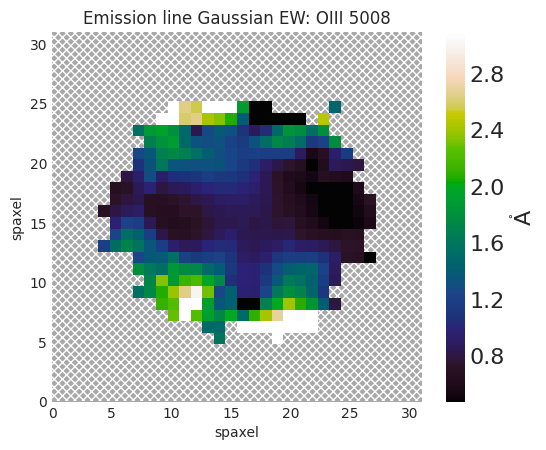

11834-9102


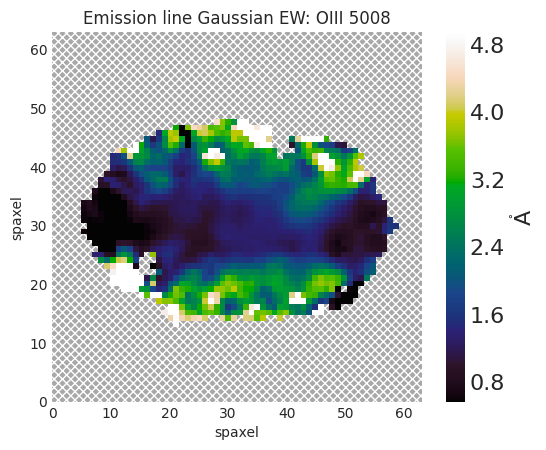

11746-9101


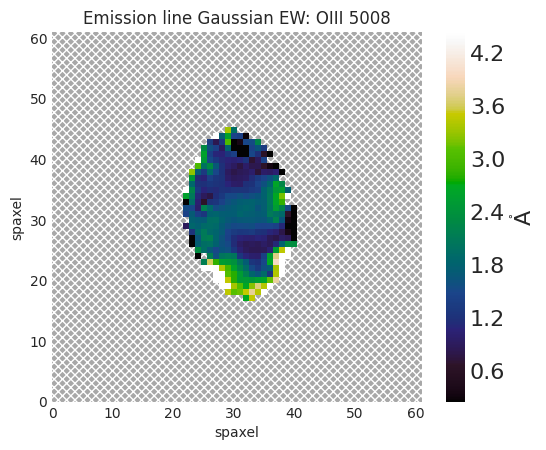

11981-1901


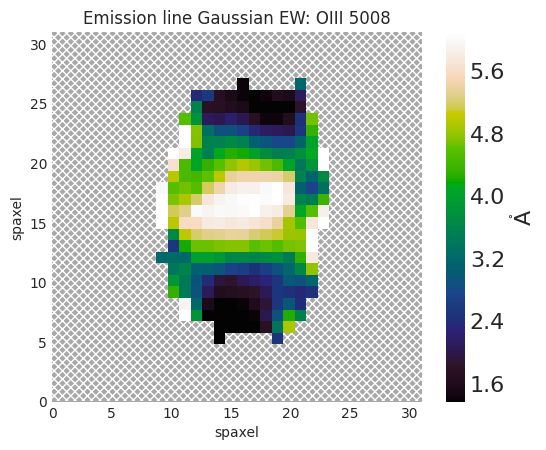

8132-1902


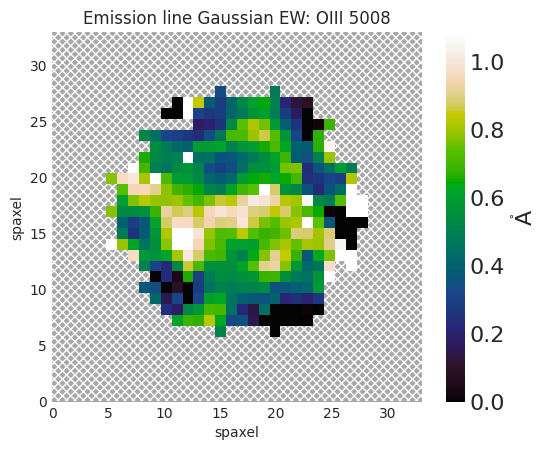

8555-1901


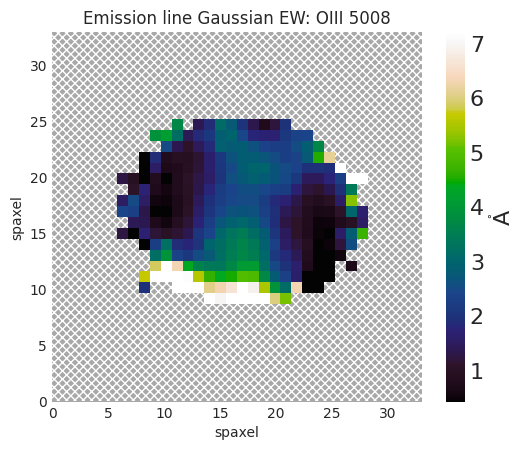

9501-1902


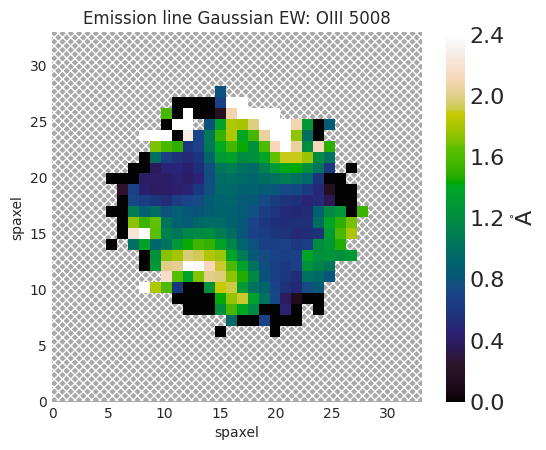

8568-1901


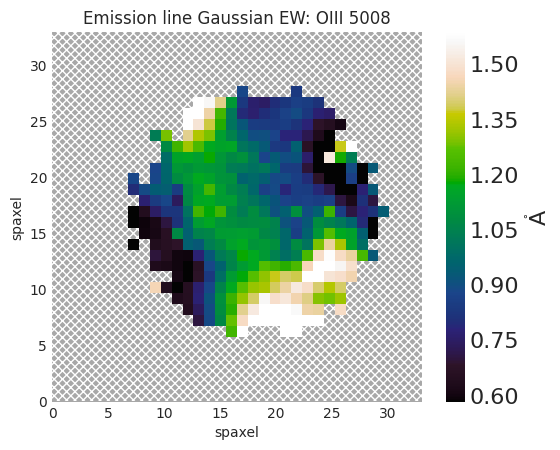

8083-3704


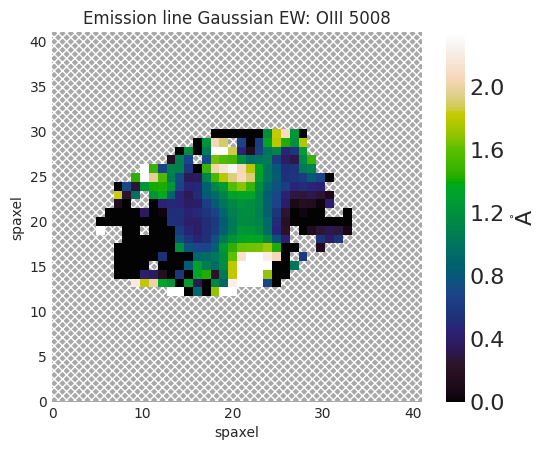

8726-1901


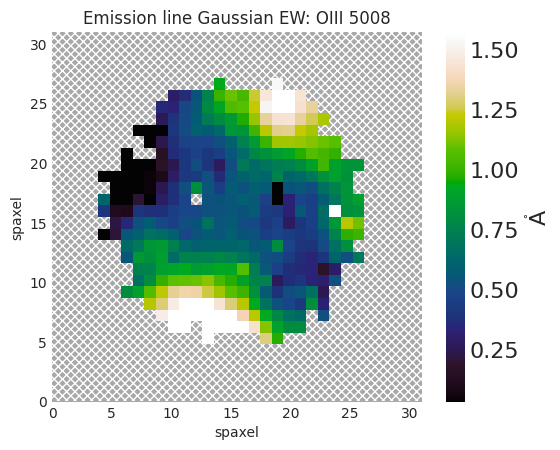

8156-6102


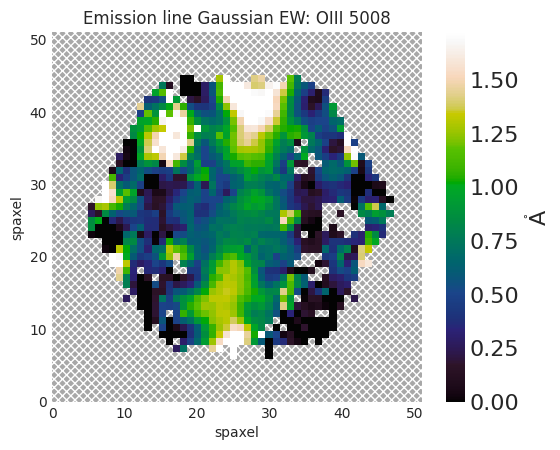

8449-1902


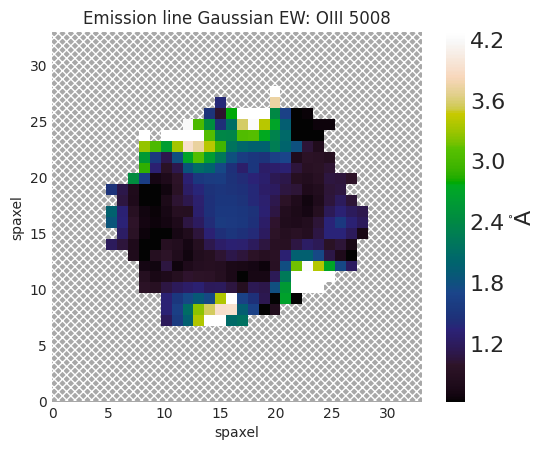

10507-1901


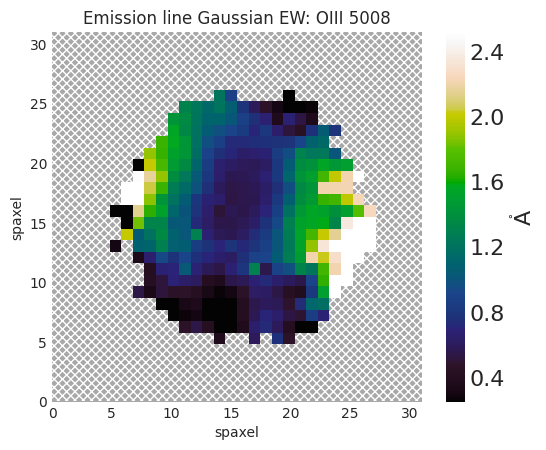

8338-3704


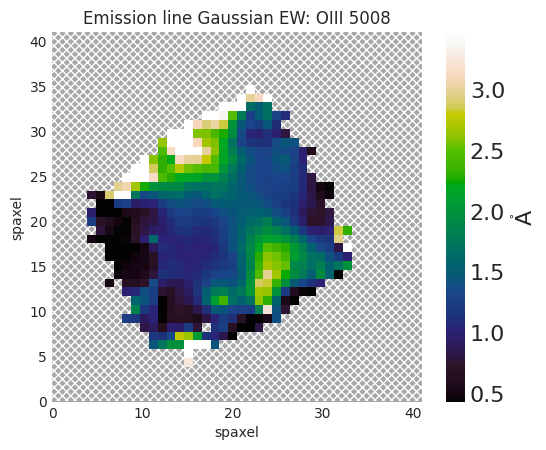

9868-1902


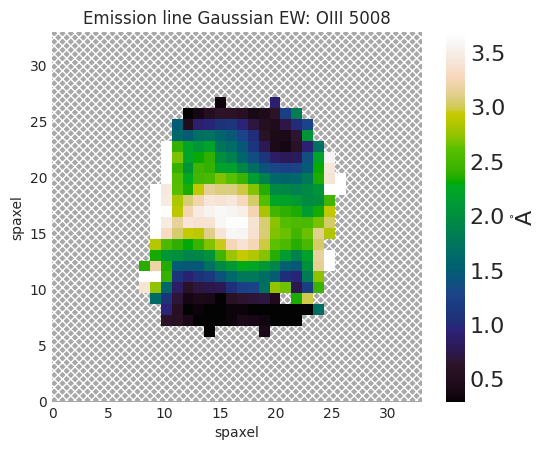

8602-6101


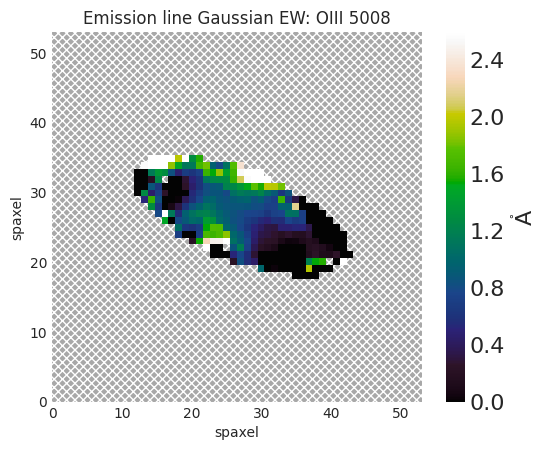

8458-1901


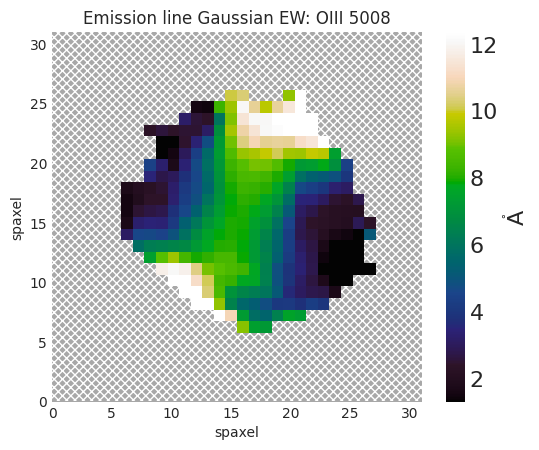

7972-3704


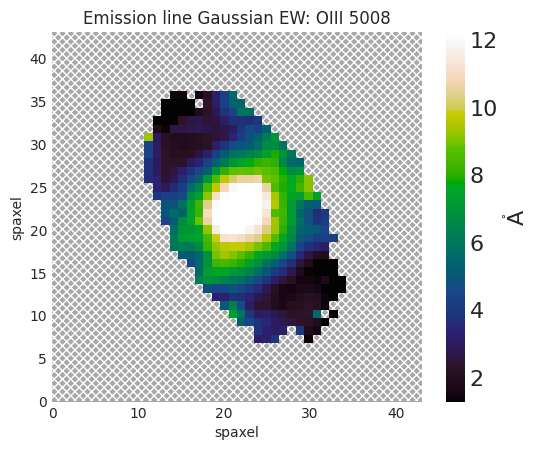

7972-3704


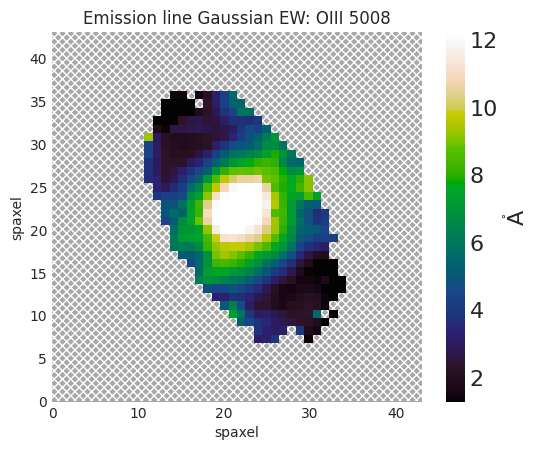

8322-3704


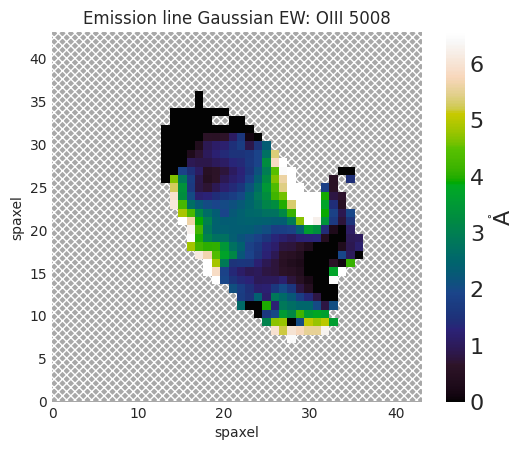

In [23]:
for i in training_copy[0:20]:
    index = loss_summary.index(i)
    plateifu = training[index]
    print(plateifu)
    maps = Maps(plateifu, bintype='SPX', template='MILESHC-MASTARSSP')
    oiii_ew = maps.emline_gew_oiii_5008
    oiii_ew.plot(snr_min = None)
    plt.show()
    
    

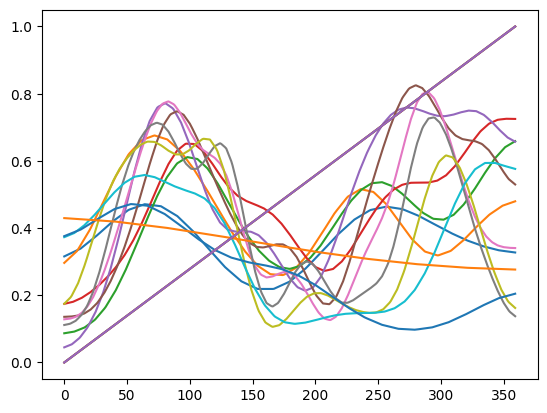

In [29]:
#data = '8449-1902' 
#data = '10519-1901' 
#data = '11832-1902'

data = '9090-1901'
#data = '8987-9102'
#data = '9031-12704'
#data = '11832-1902'

ellip = Bicone_Classifier.ellip_gen(data)
loss_list = []

for i in np.linspace(0.6, 3.6, 15):
    start, end = round(i,1), round(i,1)+0.4
    curve = Bicone_Classifier.ellip_ring_curve(ellip, in_r = start, out_r = end, cycle = 1, smooth = 3)
    plt.plot(curve)
    result = Bicone_Classifier.fourier_classifier(curve)
    #plt.plot(result[0])
    
'''
    if result[1] == 3:
        loss_list.append(result[2])
    else:
        pass
'''

#print(sum(loss_list))
plt.show()

### Plot the FT

[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


7958-9101 3 104.27959612540678


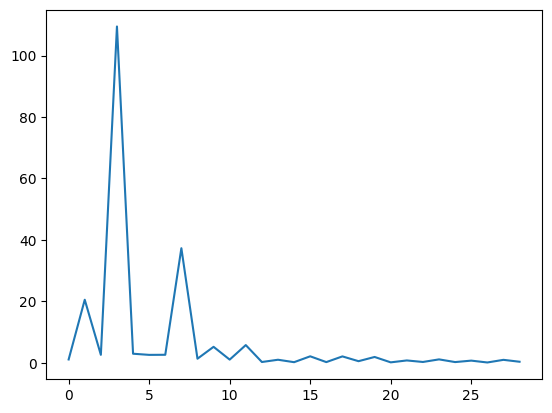

7972-3704 3 88.23560036131964


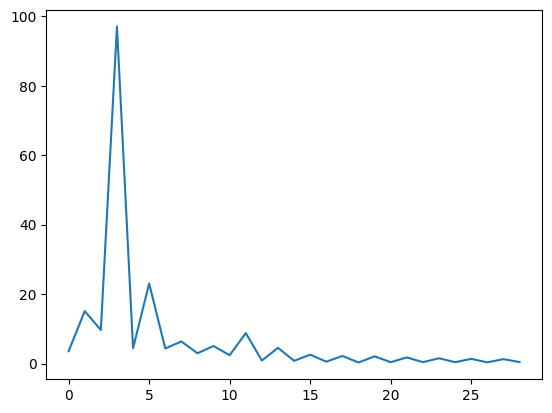

8138-6101 3 58.865706384464495


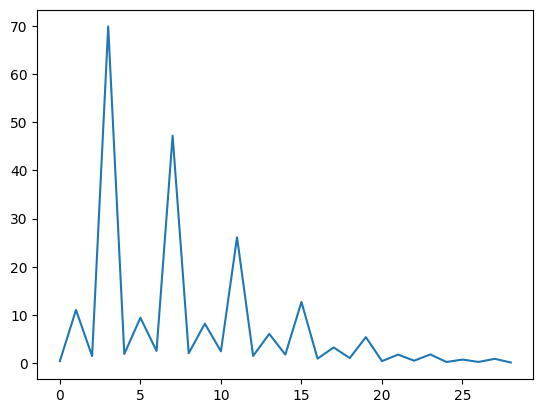

8252-9101 3 36.914354947411866


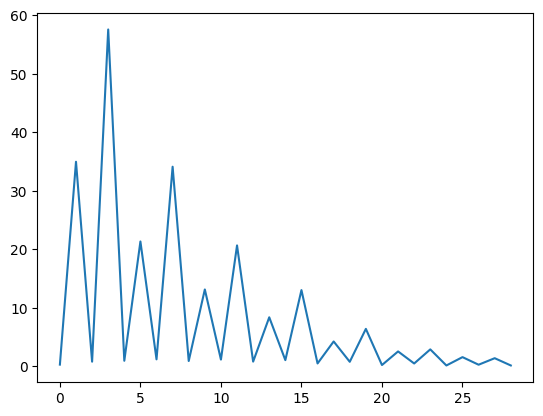

8465-12704 3 74.12191169747487


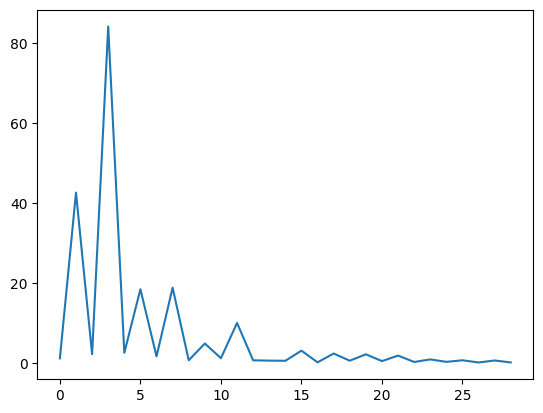

8486-12705 3 44.91389624063707


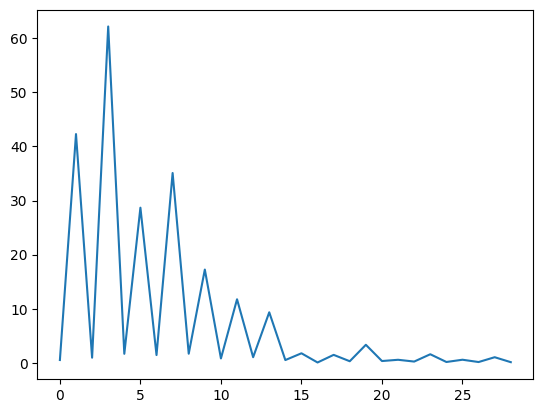

8715-6103 3 77.72135114435076


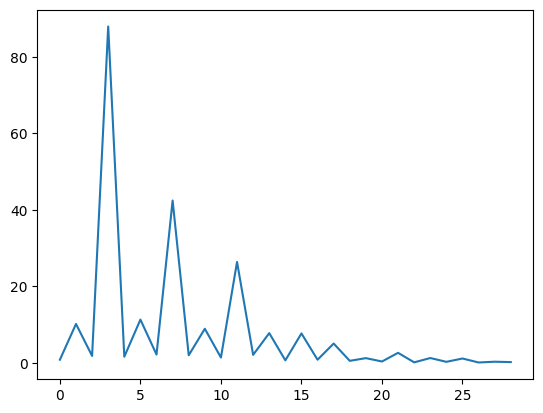

8718-12702 3 50.57117582162912


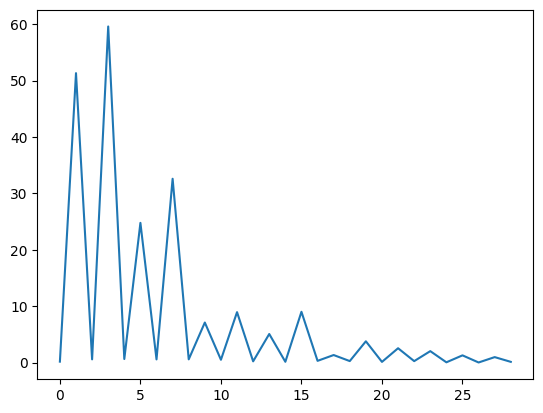

9031-12704 3 34.197764127597246


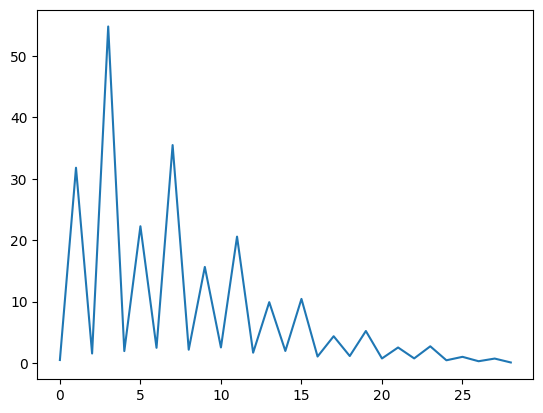

9867-9102 3 54.882337341440284


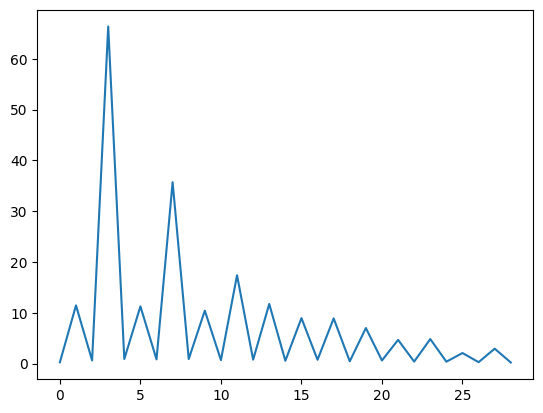

10502-12701 3 75.42791360276028


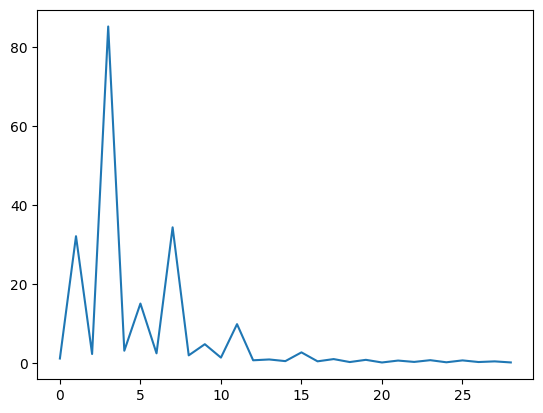

10517-3701 3 92.55060410694264


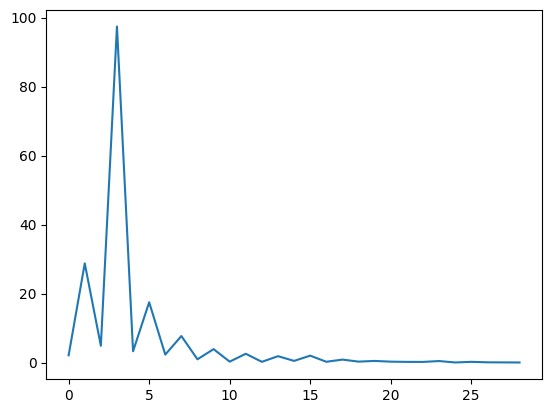

10518-3704 3 67.13720070532166


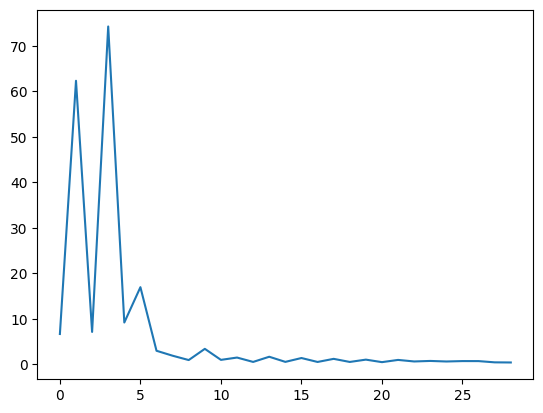

11826-6103 3 33.46003389365686


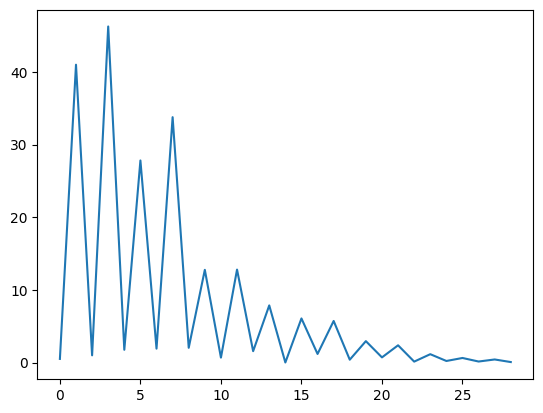

11958-3703 3 62.710650124857615


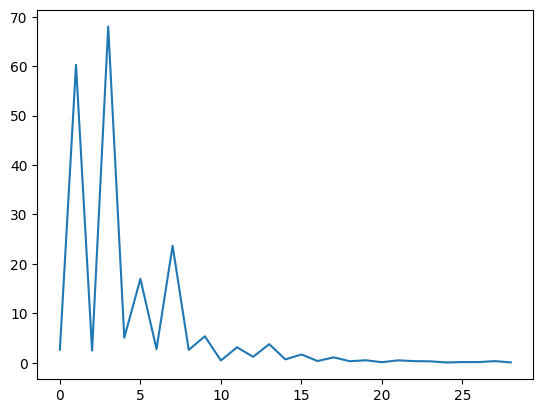

12673-6101 3 48.55609911431168


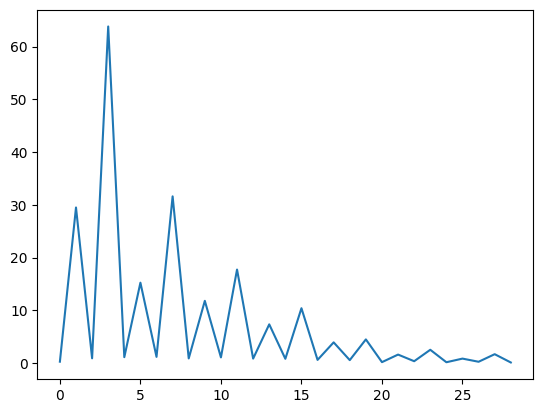

12700-6101 3 105.30834559297413


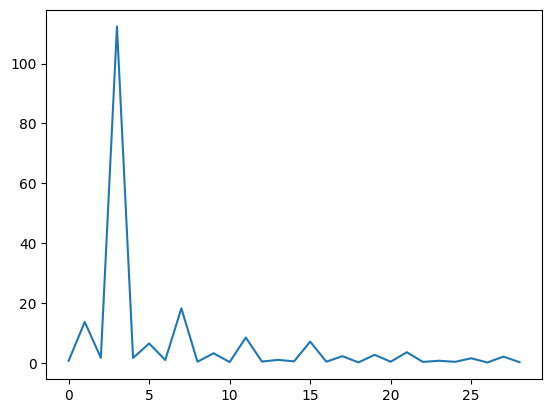

In [18]:
PATH = '/Users/runquanguan/Documents/Research/MaNGA-AGN/Pipeline&Instrction/obvious_bicone_feature_position.fits'
hdul = fits.open(PATH)
hdu = hdul[1].data['plateifu']

for data in hdu:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, in_r = 1.1, out_r = 1.3, cycle=2)[0]
        yf = np.abs(fft(curve))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-5:]))
        print(data, peak_index, loss)
        plt.show()

        


[WARNING]: unclosed file <_io.FileIO name='/Users/runquanguan/Documents/bicone_candidates_v3.fits' mode='rb' closefd=True> (ResourceWarning)


8247-1901 3 60.87687618339024


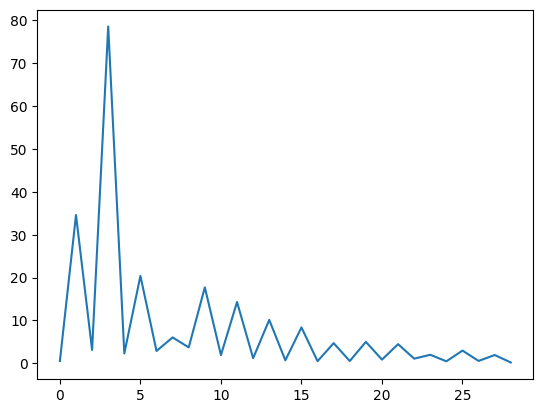

8137-12701 3 77.45405961954415


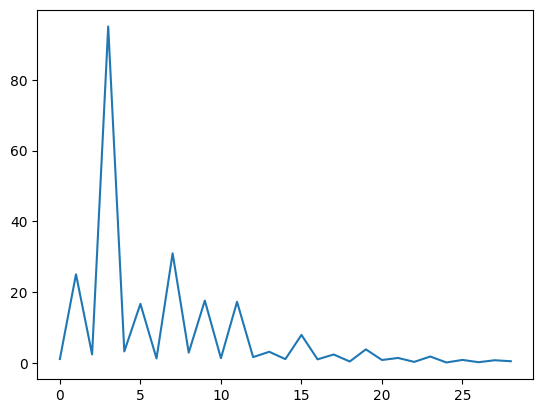

8137-3702 3 62.62114050066223


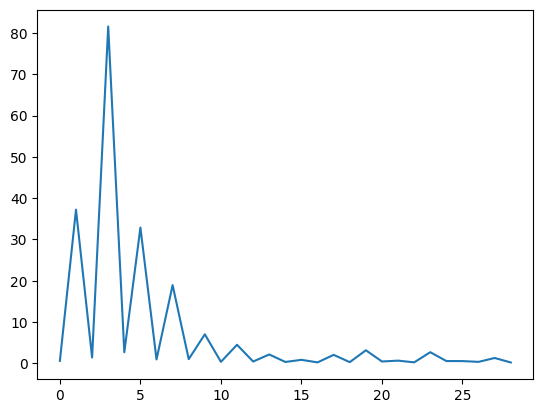

8135-9102 3 30.592962315401472


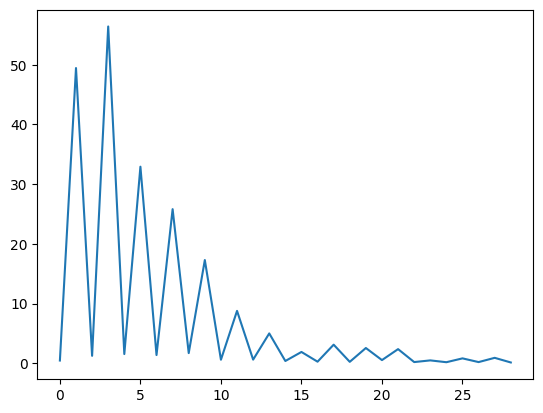

8135-3704 3 35.07781425073544


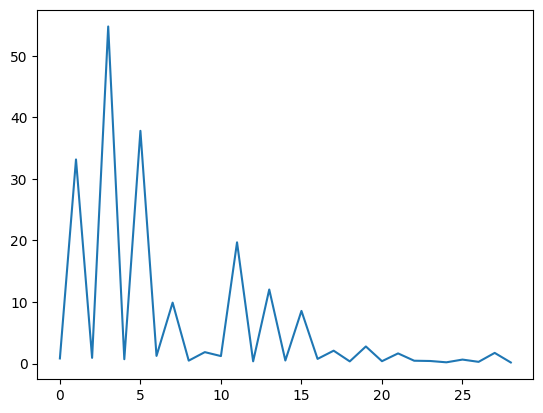

8135-6104 3 27.361937471179793


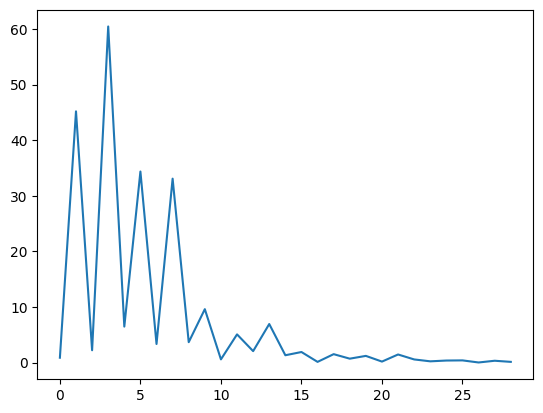

8250-1902 3 70.19790730030921


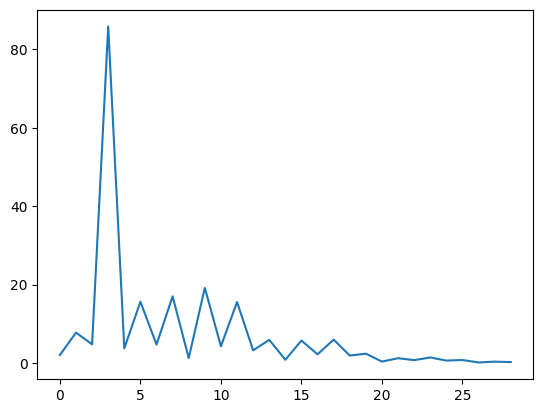

8250-6104 3 64.76347353144241


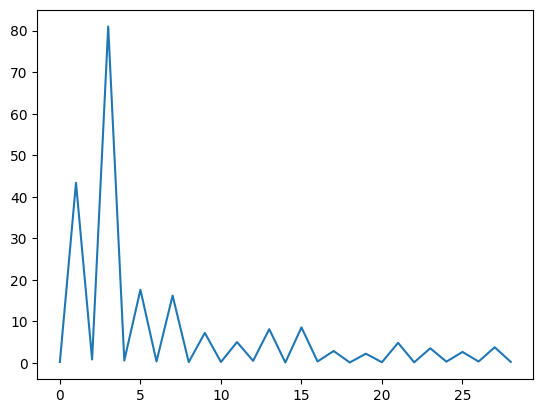

8141-6102 3 64.25981736985587


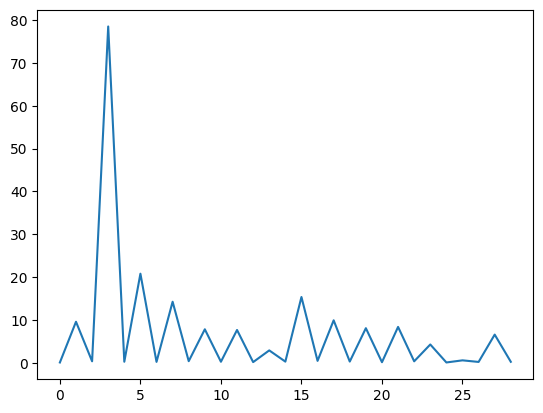

8141-12705 3 41.75717106428176


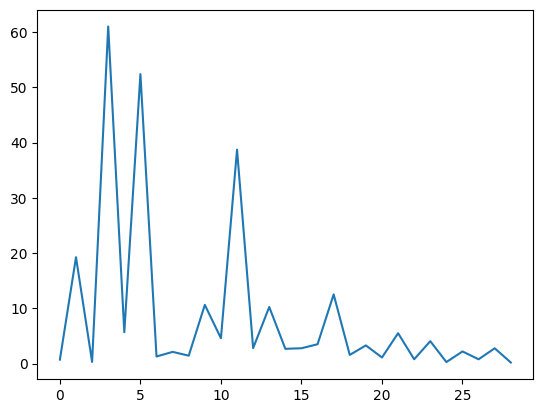

8253-12701 3 35.80046194731011


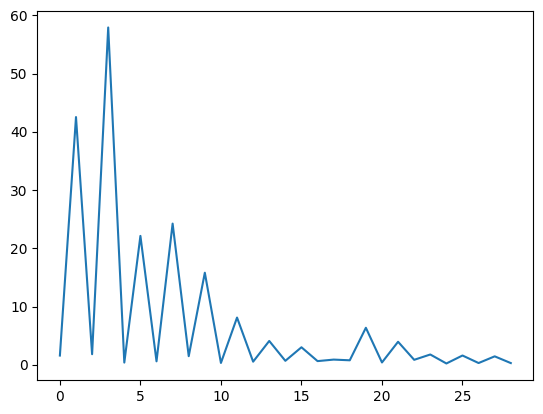

8253-3702 3 78.37427523653804


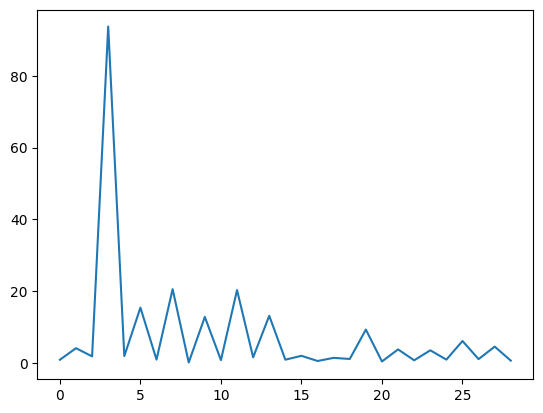

8253-3704 3 40.375949272463714


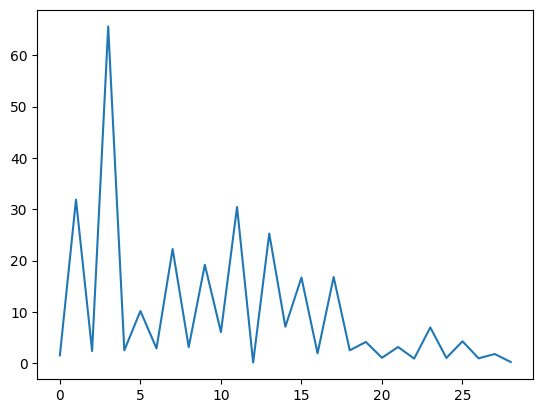

8256-6104 3 38.3766927456611


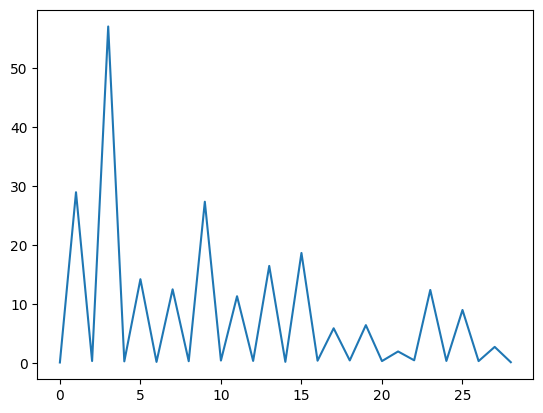

8143-9101 3 52.9533761345827


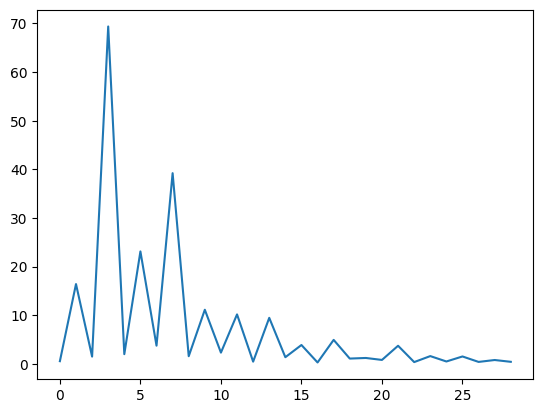

8143-1901 3 51.750184332685855


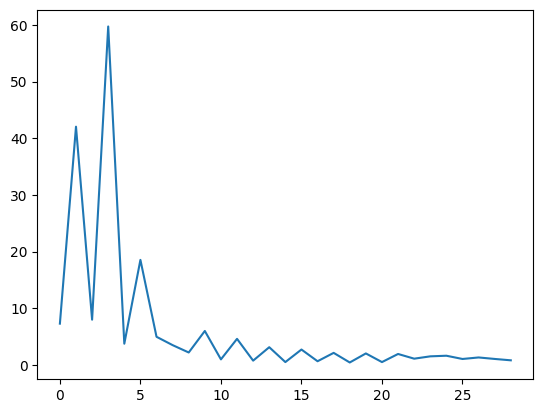

8274-6104 3 32.57901074479635


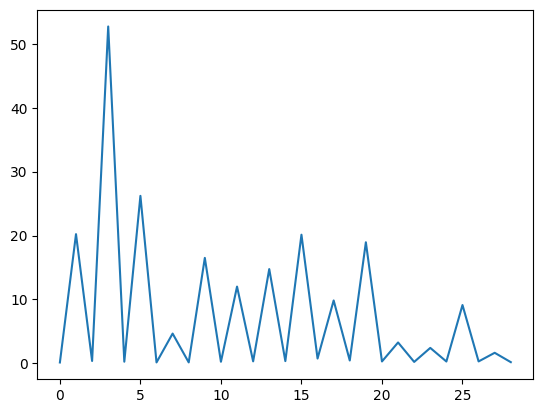

8249-12701 3 68.6652054892127


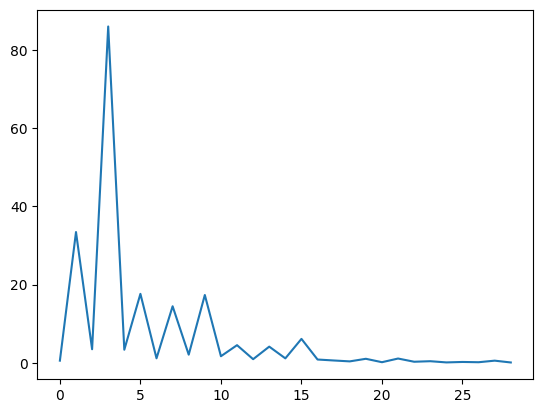

8258-1901 3 91.82328246672435


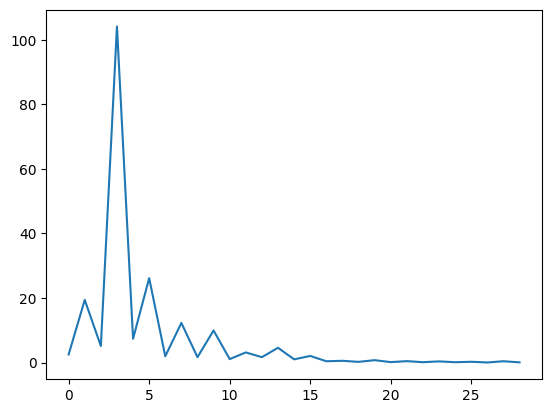

8252-9101 3 36.240247933679115


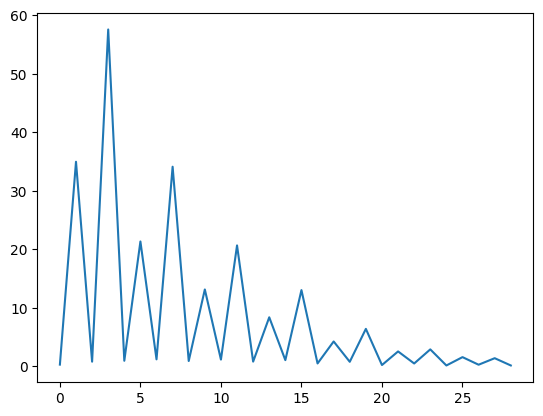

In [27]:
HEADER_PATH = '/Users/runquanguan/Documents/bicone_candidates_v4.fits'
hdul = fits.open(HEADER_PATH)
hdu = hdul[1].data
plateifu = hdu['PLATEIFU']

#fig, axes = plt.subplots (nrows=4, ncols=5,figsize =(12,11))

for data in plateifu[20:40]:
        # Load OIII MAPS from SDSS-MARVIN server
        curve = Bicone_Classifier.ellip_ring_ew(data, in_r = 1.1, out_r = 1.3, cycle=2)[0]
        yf = np.abs(fft(curve))[1:30]
        peak_value = max(yf)
        peak_index = list(yf).index(peak_value)
        plt.plot(yf)
        yf.sort()
        loss = sum(np.diff(yf[-4:]))
        print(data, peak_index, loss)
        plt.show()